In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading the dowloaded dataset
titanic_data = pd.read_csv('train.csv')

In [3]:
# describing my Dataset by displaying summarry statistics
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


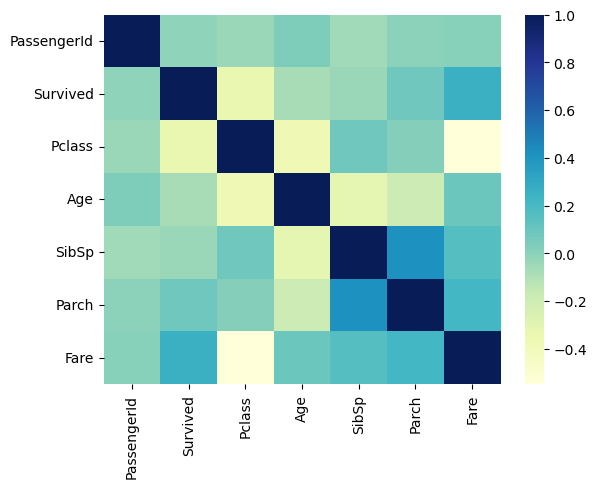

In [5]:
# Visualizing our dataset by computing correlation matrix and plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt 

#we remove the non-numeric columns
numeric_data = titanic_data.select_dtypes(include=[np.number])

#our correlation matrix
correlation_matrix = numeric_data.corr()

sns.heatmap(correlation_matrix, cmap="YlGnBu")
plt.show()

In [6]:
#Evaluating our Ml-model by Train_test splitting
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_indices, test_indices in split.split(titanic_data, titanic_data[["Survived","Pclass","Sex"]]):
        strat_train_set = titanic_data.loc[train_indices]
        strat_test_set = titanic_data.loc[test_indices]

In [7]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
701,702,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,PC 17475,26.2875,E24,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.5000,NaN,S


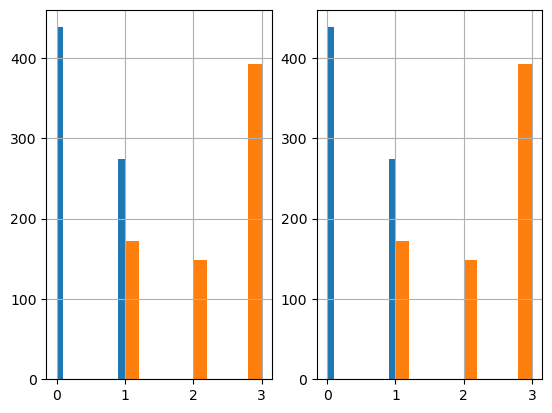

In [8]:
#EDA:Exploratory Data Analysis
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()
plt.show()




In [10]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 882 to 639
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        162 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [11]:
#Data Preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

#Inputing missing values in the Age column by Custom transformer
class AgeImputer(BaseEstimator, TransformerMixin):
    def fit(self, x,y=None):
        return self
    def transform(self, x):
        imputer = SimpleImputer(strategy="mean")
        x['Age'] = imputer.fit_transform(x[['Age']])
        return x
    

In [18]:
from sklearn.preprocessing import OneHotEncoder

#Encoding the 'embarked' column
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(x[['Embarked']]).toarray()
        
        column_names = ["C", "S", "Q", "N"]
        
        for i in range(len(matrix.T)):
            x[column_names[i]] = matrix[:, i]
            
        return x.drop("Embarked", axis=1)

In [19]:
# Custom transformer for dropping unnecessary columns
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, x):
        return self
  
    def transform(self,x):
        return x.drop(["Embarked","Name","Ticket","Cabin","Sex","N"],axis=1,errors="ignore")

In [20]:
#creating our pipeline
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                    ("featureencoder",FeatureEncoder()),
                    ("featuredropper",FeatureDropper())])

In [21]:
#We then execute our pipleline on training set
strat_train_set = pipeline.fit_transform(strat_train_set)

In [23]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 882 to 639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
dtypes: float64(5), int64(5)
memory usage: 61.2 KB


In [28]:
#we then train our model
from sklearn.preprocessing import StandardScaler

x = strat_train_set.drop(['Survived'],axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
x_data = scaler.fit_transform(x)
y_data = y.to_numpy()


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators":[10, 100, 200, 500],"max_depth":[None,5 ,10],"min_samples_split":[2, 3, 4]}

]
grid_search = GridSearchCV(clf, param_grid, cv=3,scoring="accuracy", return_train_score=True)
grid_search.fit(x_data, y_data)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [29]:
final_clf = grid_search.best_estimator_

In [30]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=10)

In [32]:
#Executing. test set
strat_test_set = pipeline.fit_transform(strat_test_set)

In [33]:
x_test = strat_test_set.drop(['Survived'],axis=1)
y_test = strat_test_set['Survived']

scaller = StandardScaler()
x_data_test = scaller.fit_transform(x_test)
y_data_test = y_test.to_numpy()

In [35]:
#Evaluating our model on test set
final_clf.score(x_data_test, y_data_test)

0.6983240223463687

In [36]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
final_data = pipeline.fit_transform(titanic_data)

In [38]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0


In [39]:
#preparing test data for production
x_final = final_data.drop(['Survived'],axis = 1)
y_final = final_data['Survived']

scaler = StandardScaler()
x_data_final = scaler.fit_transform(x_final)
y_data_final = y_final.to_numpy()


In [42]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators":[10, 100, 200, 500],"max_depth":[None, 5, 10],"min_samples_split":[2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy",return_train_score=True)
grid_search.fit(x_data_final, y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [43]:
prod_final_clf = grid_search.best_estimator_

In [44]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [45]:
#Preparing test data for prediction
titanic_test_data = pd.read_csv("test.csv")

In [46]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [47]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   C            418 non-null    float64
 7   S            418 non-null    float64
 8   Q            418 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 29.5 KB


In [48]:
x_final_test = final_test_data
x_final_test = x_final_test.fillna(method="ffill")

scaler = StandardScaler()
x_data_final_test = scaler.fit_transform(x_final_test)

In [49]:
predictions = prod_final_clf.predict(x_data_final_test)

In [50]:
print(titanic_test_data.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'S', 'Q'],
      dtype='object')


In [54]:
#exporting our predictions to csv
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("prediction.csv", index=False)

In [55]:
final_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
